### 00_Import and reset device

In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from numba import cuda

2024-05-10 16:41:42.070856: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 16:41:42.766410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 01_MNIST digit data

In [4]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/j-hyungjun/venv/env_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-10 16:44:54.611674: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-10 16:44:54.611702: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: j-hyungjun
2024-05-10 16:44:54.611708: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: j-hyungjun
2024-05-10 16:44:54.611788: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-05-10 16:44:54.611811: I external/local_xla/xla/stre

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8882 - loss: 0.3898 - val_accuracy: 0.9624 - val_loss: 0.1220
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9737 - loss: 0.0881 - val_accuracy: 0.9769 - val_loss: 0.0766
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9846 - loss: 0.0520 - val_accuracy: 0.9784 - val_loss: 0.0702
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9891 - loss: 0.0369 - val_accuracy: 0.9778 - val_loss: 0.0681
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9931 - loss: 0.0229 - val_accuracy: 0.9776 - val_loss: 0.0745
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9953 - loss: 0.0169 - val_accuracy: 0.9818 - val_loss: 0.0616
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9970 - loss: 0.0123 - val_accuracy: 0.9744 - val_loss: 0.0853
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9970 - loss: 0.0114 - val_accuracy: 0.

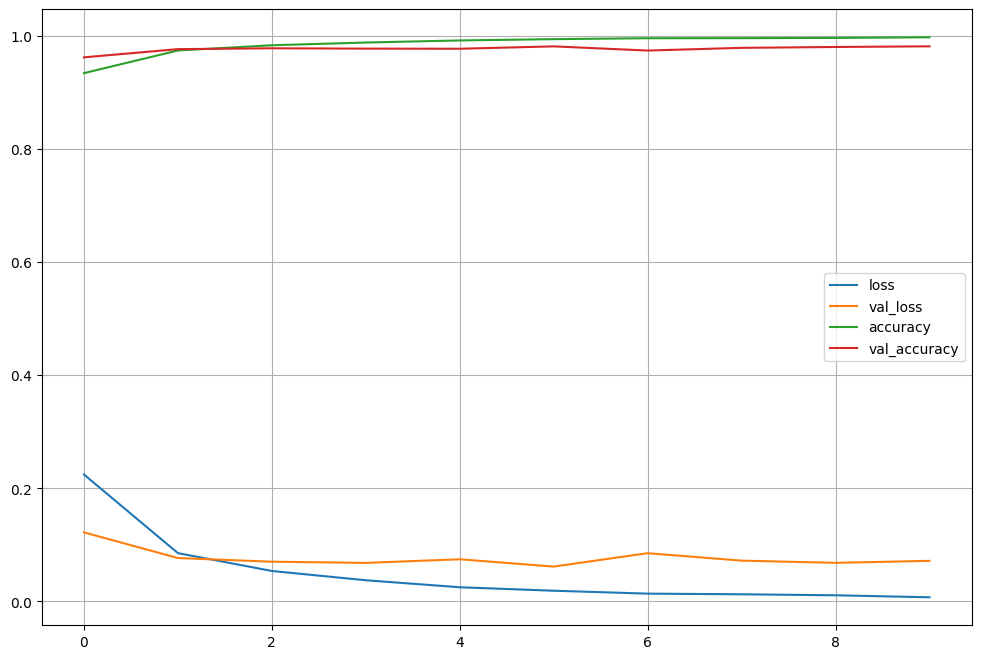

In [8]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [9]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.0860
Test loss : 0.07167387008666992
Test accuracy : 0.9818999767303467


In [10]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [11]:
wrong_result=[]

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

181

In [12]:
samples = random.choices(population=wrong_result, k=16)
samples

[1754,
 9009,
 495,
 5955,
 3550,
 5140,
 1112,
 2426,
 3503,
 5199,
 2730,
 1790,
 2953,
 1717,
 7434,
 1319]

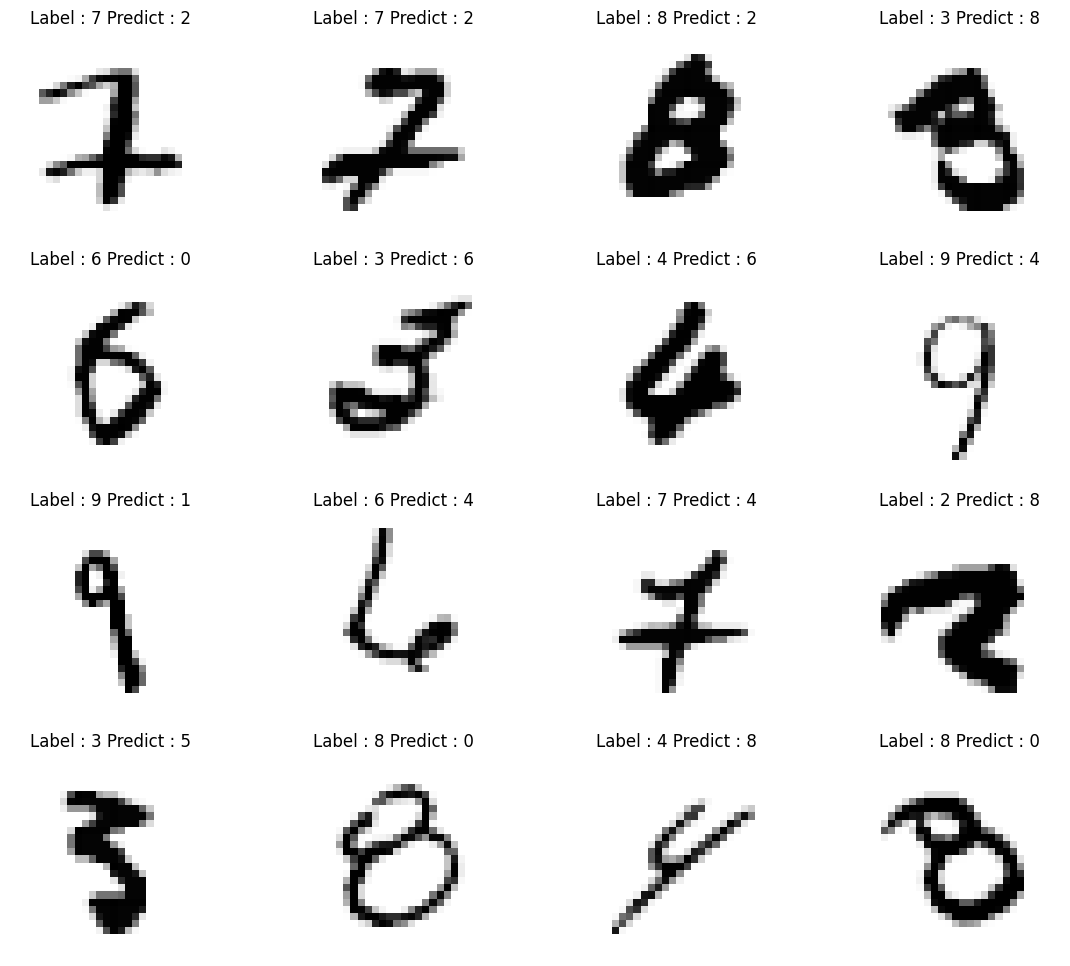

In [13]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

### 02_MNIST fashion data

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [15]:
samples = random.choices(population=range(0,len(y_train)), k=16)

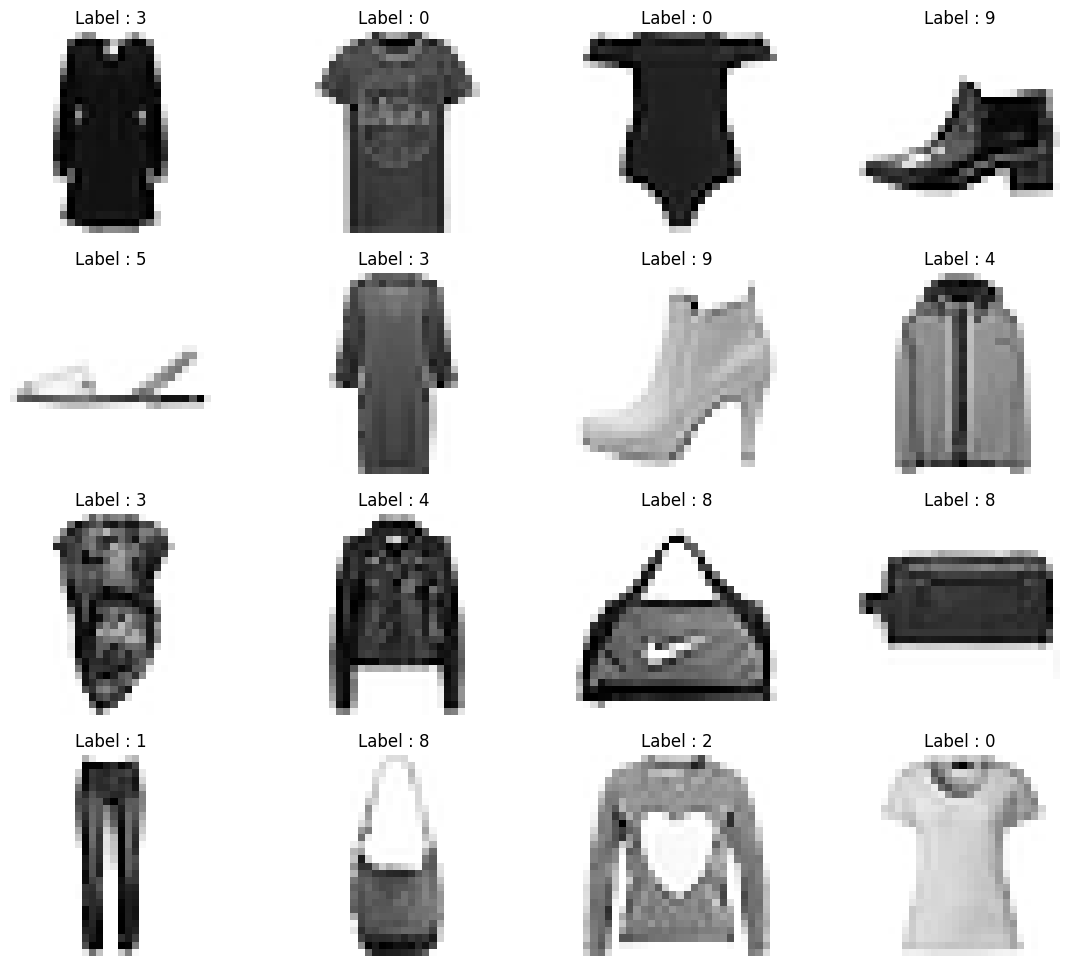

In [16]:
plt.figure(figsize=(14,12))

for dix, n in enumerate(samples):
    plt.subplot(4, 4, dix+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')

plt.show()

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7814 - loss: 0.6181 - val_accuracy: 0.8413 - val_loss: 0.4382
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8662 - loss: 0.3739 - val_accuracy: 0.8573 - val_loss: 0.4095
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8819 - loss: 0.3243 - val_accuracy: 0.8728 - val_loss: 0.3493
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8886 - loss: 0.3054 - val_accuracy: 0.8787 - val_loss: 0.3308
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8999 - loss: 0.2763 - val_accuracy: 0.8781 - val_loss: 0.3382
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9030 - loss: 0.2633 - val_accuracy: 0.8792 - val_loss: 0.3331
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9047 - loss: 0.2519 - val_accuracy: 0.8723 - val_loss: 0.3564
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9118 - loss: 0.2381 - val_accuracy: 0.

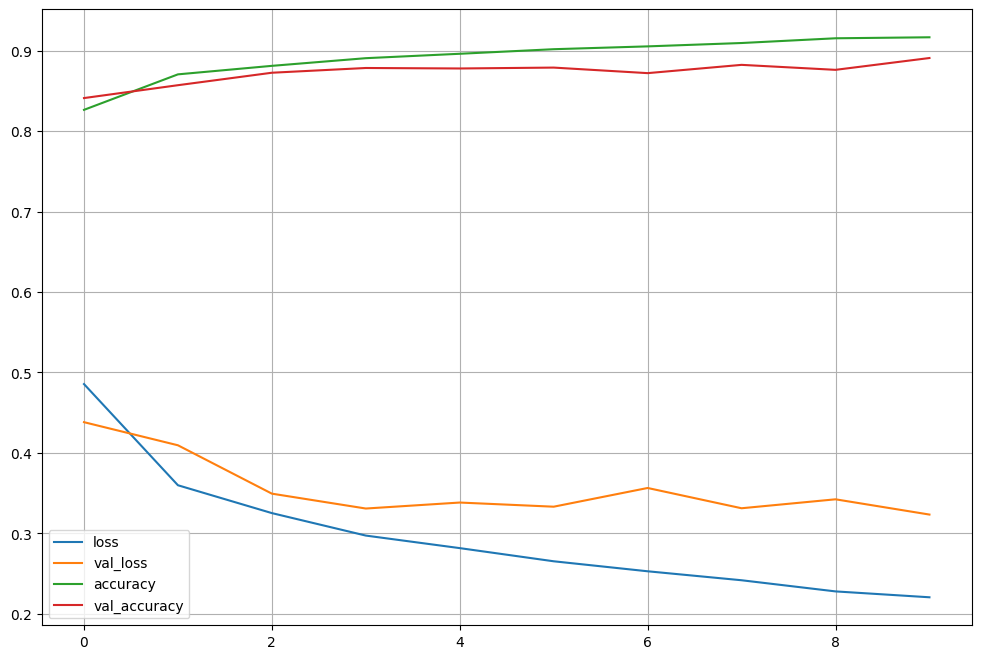

In [20]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [21]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8909 - loss: 0.3280
Test loss : 0.3232918381690979
Test accuracy : 0.8910999894142151


In [22]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [23]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [24]:
wrong_result=[]

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

1089

In [25]:
smaples = random.choices(population=wrong_result, k=16)
samples

[52013,
 25640,
 16490,
 6834,
 40462,
 34573,
 1162,
 57346,
 756,
 42222,
 45290,
 58858,
 1569,
 41483,
 22224,
 20524]

IndexError: index 52013 is out of bounds for axis 0 with size 10000

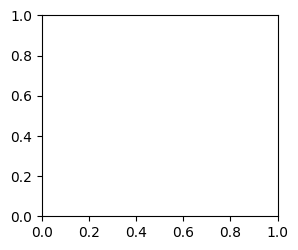

In [26]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()